# How to Run DISC on the Iris Dataset 

In [1]:
import disc

First, we introduce helper functions that wrap the return values (tuples) into python classes such that values can be accessed by name.

In [2]:
def disc_discover_patternset(dataset, alpha=0.05, min_support=1):
    t = disc.discover_patternset(dataset,alpha, min_support)
    class Result():
        patternset=[]
        frequency=[]
        bic_0=0
        bic=0
    r = Result()
    r.patternset = t[0]
    r.frequency = t[1]
    r.bic_0 = t[2]
    r.bic = t[3]
    return r

def disc_characterize_partitions(dataset, components, alpha=0.05, min_support=1):
    t = disc.characterize_partitions(dataset, components, alpha, min_support)
    class Result():
        patternset=[]
        frequency=[]
        assignment=[]
        bic_0=0
        bic=0
    r = Result()
    r.patternset = t[0]
    r.frequency = t[1]
    r.assignment=t[2]
    r.bic_0 = t[3]
    r.bic = t[4]
    return r

def disc_discover_composition(dataset, alpha=0.05, min_support=1):
    t = disc.discover_composition(dataset, alpha, min_support)
    class Result():
        patternset=[]
        frequency=[]
        components=[]
        assignment=[]
        bic_0=0
        bic=0
    r = Result()
    r.patternset = t[0]
    r.frequency = t[1]
    r.assignment=t[2]
    r.components = t[3]
    r.bic_0 = t[4]
    r.bic = t[5]
    return r

Now we load the iris dataset and convert it into a sparse binary matrix format.

In [3]:
import numpy as np
from sklearn.datasets import load_iris

data = load_iris()
dat = data.data.round(0)
labels = list(data.target.astype(int))

# ``binarize''
dat[:,0] -= min(dat[:,0])
for c in [1, 2, 3]:
    dat[:,c] -= min(dat[:,c]) - max(dat[:,c - 1]) - 1
    
dat = list(dat.astype(int))

1. Discover a patternset for iris dataset
2. Discover the pattern-composition, the partitioning of Iris and characteristic patternsets

In [4]:
r1 = disc_discover_patternset(dat)
r2 = disc_discover_composition(dat)

<IPython.core.display.Javascript object>


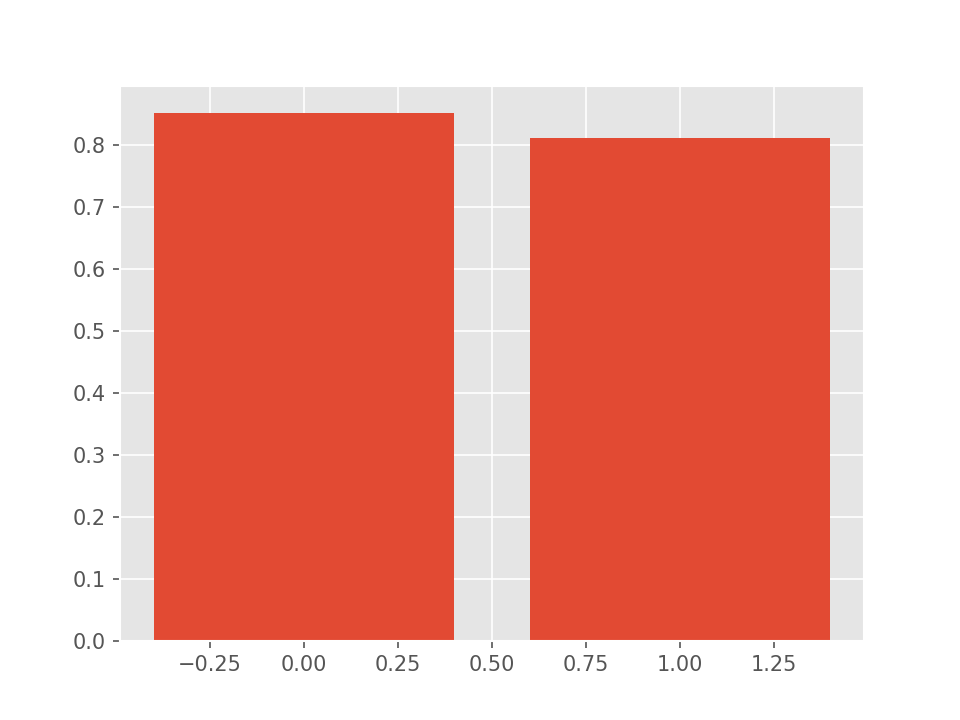

<BarContainer object of 2 artists>

In [5]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

plt.bar([0, 1], [r1.bic / r1.bic_0, r2.bic / r2.bic_0])